In [101]:
from google.colab import drive
drive.mount('/content/drive')

!pwd
%cd /content/drive/MyDrive/ML2023/data-analysis
# !ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/ML2023/data-analysis
/content/drive/MyDrive/ML2023/data-analysis


# **CLASSIFIER**

*This algorithm will identify the optimal classification machine learning model for a given dataset.*

# Import the helper classes

In [102]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import math
from plotly.subplots import make_subplots

from aka_data_analysis.aka_plot import aka_plot, aka_correlation_analysis
from aka_data_analysis.aka_learning import aka_learn,aka_clean,aka_filter

aka_plot = aka_plot()
aka_corr_an = aka_correlation_analysis()
aka_clean = aka_clean()
aka_learn = aka_learn()
aka_filter = aka_filter()
aka_corr_an = aka_correlation_analysis()

In [103]:
# import warnings
# from sklearn.exceptions import FitFailedWarning
# # Filter out the FitFailedWarning
# warnings.filterwarnings("ignore", category=FitFailedWarning)
# warnings.filterwarnings("ignore", category=UserWarning)

In [104]:

import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff
import plotly.express as px
import numpy as np
import pandas as pd


# Dataset Information




The data is provided by: https://www.kaggle.com/datasets/saurabhbadole/bank-customer-churn-prediction-dataset




This dataset provides details regarding bank customers and their churn status, indicating whether they have exited the bank or not. It is well-suited for investigating and analyzing the factors that influence customer churn in banking institutions. Additionally, it can be used to develop predictive models aimed at identifying customers who are at risk of churning.

| Column Name     | Description                                                        |
|-----------------|--------------------------------------------------------------------|
| RowNumber       | The sequential number assigned to each row in the dataset.         |
| CustomerId      | A unique identifier for each customer.                             |
| Surname         | The surname of the customer.                                      |
| CreditScore     | The credit score of the customer.                                  |
| Geography       | The geographical location of the customer (e.g., country or region).|
| Gender          | The gender of the customer.                                        |
| Age             | The age of the customer.                                           |
| Tenure          | The number of years the customer has been with the bank.           |
| Balance         | The account balance of the customer.                               |
| NumOfProducts   | The number of bank products the customer has.                      |
| HasCrCard       | Indicates whether the customer has a credit card (binary: yes/no). |
| IsActiveMember  | Indicates whether the customer is an active member (binary: yes/no).|
| EstimatedSalary | The estimated salary of the customer.                              |
| Exited          | Indicates whether the customer has exited the bank (binary: yes/no).|



# Import Dataset

In [105]:
df = aka_clean.df_get('Banking_Customer_Churn/Churn_Modelling.csv')

# Clean Data

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [107]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Swap the target and the last feature

In [108]:
df = aka_clean.swap_features(df,-1)
df.head()

Invalid feature indices or feat_a is equal to feat_b.


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Drop feature(s)


In [109]:
feat = [0,1,2]
df = aka_clean.drop_feature(df,feat)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [110]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


##  Convert categorical variables into numerical representations

In [111]:
mapping,swapMapping = aka_clean.CleaningVar(df)
df = aka_clean.CleaningDF(df,mapping)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


## Balance Dataset

<Axes: ylabel='count'>

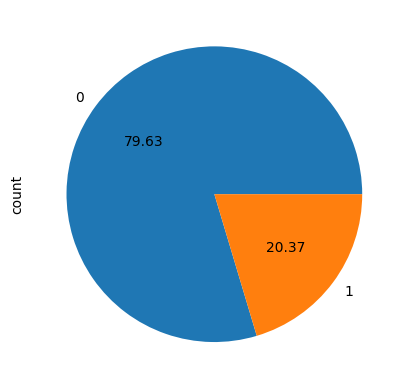

In [112]:
df[df.columns[-1]].value_counts().plot.pie(autopct='%.2f')

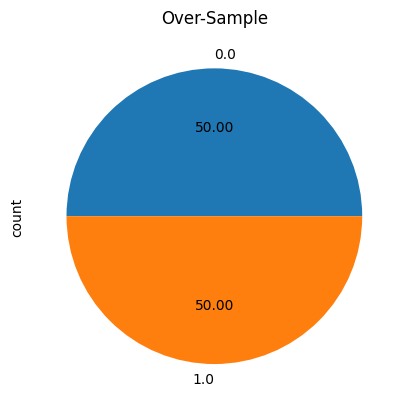

In [113]:
df = aka_clean.balance_df(df,1)

## Clean Dataset

In [114]:

confidence_interval_limit =   4             # Define the limits m of the confidence interval [-m, m] and eliminate the outliers'''

correlation_percentage_threshold = .8      # Set the limit of the correlation between the feature to be removed

df_filtered,corr_tmp = aka_learn.filter_drop_corr_df(df,confidence_interval_limit,correlation_percentage_threshold)

diff_shape = (df.shape[0]-df_filtered.shape[0],df.shape[1]-df_filtered.shape[1])
diff_shape,df_filtered.shape

((5929, 0), (4071, 11))

## Graph the features that are highly correlated


In [115]:
fig = aka_corr_an.Plot_Correlate_Features(df,list(corr_tmp),400,500,3)
if fig is not None:
    fig.show()

Empty list is provided.


## Visualize the distribution of the filtered dataset

In [116]:
aka_plot.Plot_box_Features(df,df_filtered,400,500,3,range(df_filtered.shape[1]))

# Search for the most effective ML algorithm to learn the dataset

## Choose the parameters for the searching

<center>


<font size="45">

**Table of the list of machine learning algorithms to use in the search**

|Keys | ML name |
------ |----------------------
|LGC| Logistic Regression |    
|DTC| Decision Tree Classifier|
|KNN| K-Nearest Neighbors |
|SVC| Support Vector Classification |
|GNB| Gaussian Naive Bayes |
|SGD| Stochastic Gradient Descent |
|ABC| AdaBoost classifier|
|RFC| Random Forest Classifier|
|GBC| Gradient Boosting Classifier|

</font>

</center>

In [117]:

mls = ['DTC','RFC', 'KNN', 'ABC']    # Choose the key of the Machine learning algorithm'GNB',


pre_proc = 'NM'                             # Choose between 'XY' to standardize both 'X' and 'Y',
                                              #                'X' to standardize only 'X',
                                              #                'Y' to standardize only 'Y',
                                              #                'none' to not standardize the dataset
disp_dash = 'all'                             # Choose between  'all' to diplay all report of the ML
                                              #                 'sup'  to display the most significant report

mach = 'adv'                                  # Choose between  'adv' to use advanced parameters in the ML model
                                              #                  'none' to use a default parameters

file_name = 'data'                            # Enter the name of the output data file for the report

file_name_scre = 0.85                        # Enter the minimum value of the ML score to be saved in the report

In [118]:
aka_learn.Search_ML_2(df_filtered ,mls,mach,pre_proc,confidence_interval_limit,correlation_percentage_threshold,diff_shape,disp_dash,file_name,file_name_scre)

conf_inter  corr_per  size_removed  ML   score      MSE    simul_time(min)
___________________________________________________________________________
  4      0.8     (5929, 0)     DTC     76.350     0.236      0.07 
  4      0.8     (5929, 0)     RFC     77.005     0.230      0.38 
  4      0.8     (5929, 0)     KNN     50.982     0.490      0.10 
  4      0.8     (5929, 0)     ABC     77.087     0.229      0.81 


In [123]:
ml = 'RFC'
pre_proc = 'none'

clf,scre,MSE_,y_test,y_pred = aka_learn.ML_pred(df_filtered,pre_proc,ml)



## Confusion Matrix

In [124]:
y_pred_ = aka_clean.swap_map(y_pred,swapMapping)
y_test_ = aka_clean.swap_map(y_test,swapMapping)
Label = [ str(un) for un in np.unique(pd.concat([y_pred_, y_test_]))]

In [125]:
shw = 1
fig2 =  aka_plot.plot_confusion_matrix(y_test_,y_pred_,Label,shw)
fig2.show()

## Classification Report

In [126]:
shw = 1
fig3 =  aka_plot.plot_classification_report(y_test_,y_pred_,Label,shw)
fig3.show()